In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'/Users/prateeksharma/Documents/Instacart Basket Analysis'

In [4]:
#Importing data set
df=pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_active_cust.pkl'))

In [5]:
#Checking for missing values
df.isnull().sum()

product_id                   0
product_name                 0
aisle_id                     0
department_id                0
prices                    4598
order_id                     0
user_id                      0
order_number                 0
order_dow                    0
order_hour_of_day            0
days_since_prior_order       0
add_to_cart_order            0
reordered                    0
Busiest_period_of_day        0
max_order                    0
loyalty_flag                 0
spending_habits              0
spending_flag                0
order_frequency              0
order_frequency_flag         0
first_name                   0
last_name                    0
gender                       0
state                        0
age                          0
date_joined                  0
number_of_dependants         0
marital_status               0
income                       0
_merge                       0
regional_flag                0
customer_activity            0
dtype: i

In [6]:
df_nan=df[df['prices'].isnull()==True]

In [7]:
df.shape

(29303281, 32)

In [8]:
#Creating a new data set df_clean with non-missing values
df_final=df[df['prices'].isnull()==False]

In [9]:
df_final.shape

(29298683, 32)

In [10]:
#Importing Data
df_ods=pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'orders_wrangled.csv'))

In [11]:
df_dep=pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'departments_wrangled.csv'))

In [12]:
df_dep.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [13]:
#Changing unnamed column name to departemnt_id
df_dep.rename (columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [14]:
df_dep.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [15]:
#Merging the df's
df_dep=df_final.merge(df_dep, on='department_id',how='inner')

In [16]:
df_dep.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,...,state,age,date_joined,number_of_dependants,marital_status,income,_merge,regional_flag,customer_activity,department
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,active,snacks
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,active,snacks
2,4913,Table Water Crackers,78,19,4.4,894221,138,23,5,13,...,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,active,snacks
3,11759,Organic Simply Naked Pita Chips,107,19,4.4,1986630,138,7,0,12,...,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,active,snacks
4,13424,Almonds,45,19,4.2,3139998,138,28,6,11,...,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,active,snacks


In [17]:
#Checking
df_dep['_merge'].value_counts()

_merge
both          29298683
left_only            0
right_only           0
Name: count, dtype: int64

In [18]:
#Creating age_segment flag
df_dep.loc[(df_dep['age'] >=18) & (df_dep['age'] <38), 'age_segment_flag'] = 'young adults(18-37)'
df_dep.loc[(df_dep['age'] >=38) & (df_dep['age'] <58), 'age_segment_flag'] = 'miidle-aged(38-58)'
df_dep.loc[(df_dep['age'] >=58), 'age_segment_flag'] = 'seniors(58+)'

In [19]:
df_dep['age_segment_flag'].value_counts(dropna=False)

age_segment_flag
seniors(58+)           10912001
miidle-aged(38-58)      9219666
young adults(18-37)     9167016
Name: count, dtype: int64

In [20]:
#Creating random samples using a sample data with a 70/30 split
np.random.seed(4)
dev=np.random.rand(len(df_dep)) <= 0.7

In [21]:
#Store 70% of the sample in the dataframe big
big_age_segment= df_dep[dev]

In [22]:
#Store 30% of the sample in the dataframe small
small_age_segment = df_dep[~dev]

In [23]:
len(df_dep)

29298683

In [24]:
len(big_age_segment)+len(small_age_segment)

29298683

In [25]:
#Reducing sample size 
age_seg=small_age_segment[['order_dow', 'order_hour_of_day','prices','department','order_id',
                     'regional_flag','age_segment_flag','loyalty_flag','marital_status','income']]

/var/folders/1h/3sdj2tc1297dytyhjybm86l00000gn/T/ipykernel_7470/270954908.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  age_segment_line=sns.lineplot(data = age_seg, x= 'order_dow', y = 'prices', hue='age_segment_flag',ci=None)
/Users/prateeksharma/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/prateeksharma/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


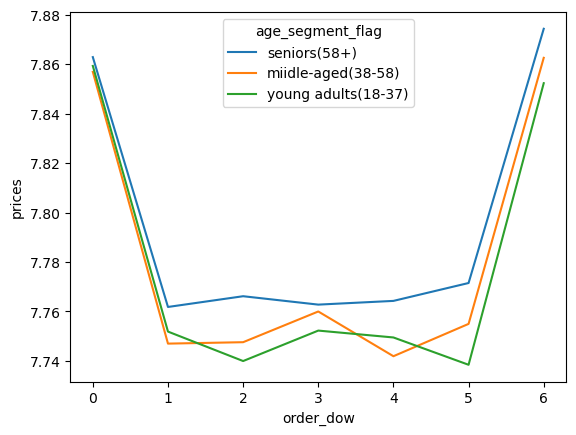

In [26]:
#Creating line chart for age_segment flag
age_segment_line=sns.lineplot(data = age_seg, x= 'order_dow', y = 'prices', hue='age_segment_flag',ci=None)
plt.show()

In [27]:
#Exporting plot
age_segment_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_segment_line.png'))

:order_dow means 'days of the week" and each day corresponds to a number as follows:
- 0 = Saturday
- 1 = Sunday
- 2 = Monday
- 3 = Tuesday
- 4 = Wednesday
- 5 = Thurdsday
- 6 = Friday

/var/folders/1h/3sdj2tc1297dytyhjybm86l00000gn/T/ipykernel_7470/1244124786.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  age_segment_line2=sns.lineplot(data = age_seg, x='order_hour_of_day', y = 'prices', hue='age_segment_flag',ci=None)
/Users/prateeksharma/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/prateeksharma/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


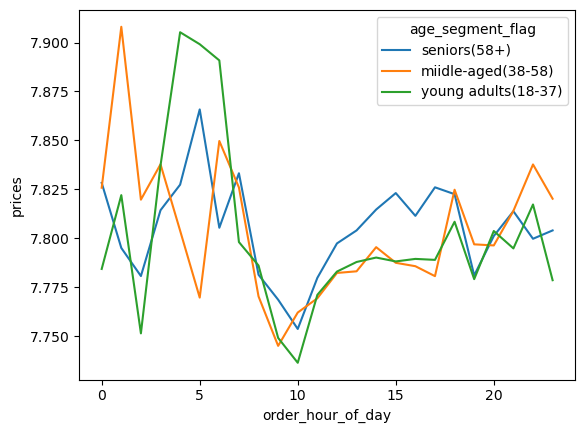

In [28]:
#Creating line chart for order_hour_of_day
age_segment_line2=sns.lineplot(data = age_seg, x='order_hour_of_day', y = 'prices', hue='age_segment_flag',ci=None)
plt.show()

In [29]:
#Exporting plot
age_segment_line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_segment_line2.png'))

In [30]:
#Aggregating 'order_id' and 'prices' for age_segment
agg_age_seg= age_seg.groupby(['department', 'age_segment_flag','regional_flag'], as_index=False).agg({'order_id': 'count', 'prices': 'sum'})

In [31]:
agg_age_seg.head()

,department,age_segment_flag,regional_flag,order_id,prices
0,alcohol,miidle-aged(38-58),Midwest,2822,23317.5
1,alcohol,miidle-aged(38-58),Northeast,2404,19502.9
2,alcohol,miidle-aged(38-58),South,3996,32991.4
3,alcohol,miidle-aged(38-58),West,3393,27702.7
4,alcohol,seniors(58+),Midwest,3441,27615.3


/var/folders/1h/3sdj2tc1297dytyhjybm86l00000gn/T/ipykernel_7470/3393988405.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  dept_age=sns.barplot(data=agg_age_seg,x='prices',y='department',hue='age_segment_flag',palette='RdYlGn',estimator=np.mean,ci=None)


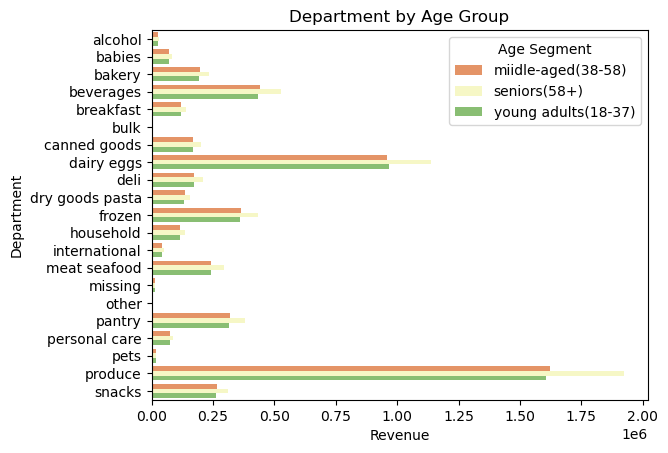

In [32]:
#Creating bar plot department wise for age segment 
dept_age=sns.barplot(data=agg_age_seg,x='prices',y='department',hue='age_segment_flag',palette='RdYlGn',estimator=np.mean,ci=None)
plt.title("Department by Age Group")
plt.xlabel("Revenue")
plt.ylabel("Department")
plt.legend(title='Age Segment')
plt.show()

In [33]:
#Aggregating age_segment values
agg_age_seg=df_dep.groupby('age_segment_flag').agg({'max_order': ['mean','max','min'], 'prices': ['sum','mean','max','min','count']})

In [34]:
agg_age_seg.head()

max_order              prices                       \
                          mean max min         sum      mean   max  min   
age_segment_flag                                                          
miidle-aged(38-58)   35.328476  99   5  71825371.3  7.790453  25.0  1.0   
seniors(58+)         35.216599  99   5  85073627.4  7.796336  25.0  1.0   
young adults(18-37)  35.291349  99   5  71372365.0  7.785779  25.0  1.0   

                               
                        count  
age_segment_flag               
miidle-aged(38-58)    9219666  
seniors(58+)         10912001  
young adults(18-37)   9167016

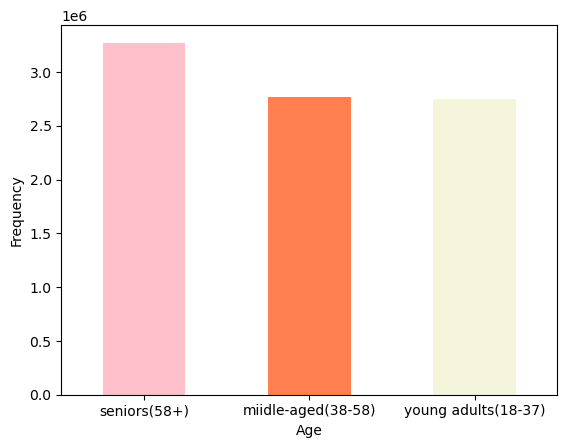

In [35]:
#Creating bar plot for age_segment
age_seg_box=age_seg['age_segment_flag'].value_counts().plot.bar(color=['pink','coral','beige'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [36]:
#Exporting plot
age_seg_box.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_segment_box.png'))

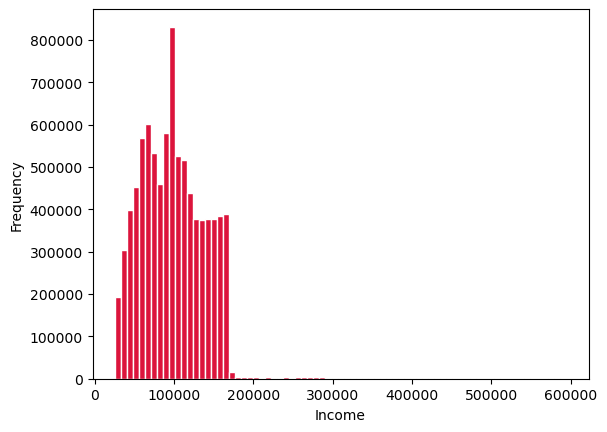

In [37]:
#Creating Histogramm for Income groups
hist_income = age_seg['income'].plot.hist(xlabel='Income', ylabel='Frequency',edgecolor='white',color='crimson',bins =75)
plt.show()

In [38]:
#Exporting plot
hist_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histo_income.png'))

In [39]:
age_seg['income'].describe()

count    8.788402e+06
mean     9.969543e+04
std      4.307291e+04
min      2.590300e+04
25%      6.736700e+04
50%      9.678000e+04
75%      1.281210e+05
max      5.939010e+05
Name: income, dtype: float64

In [40]:
#Creating income_group flag
df_dep.loc[(df_dep['income'] <=67334), 'income_group'] = 'Low-income'
df_dep.loc[(df_dep['income'] > 67334) & (df_dep['income'] < 128089), 'income_group'] = 'Avg-income'
df_dep.loc[(df_dep['income'] >= 128089), 'income_group'] = 'High-income'

In [41]:
#Creating random samples using a sample data with a 70/30 split
np.random.seed(4)
dev=np.random.rand(len(df_dep)) <= 0.7

In [42]:
#Store 70% of the sample in the dataframe big
big_icgroup= df_dep[dev]

In [43]:
#Store 30% of the sample in the dataframe small
small_icgroup = df_dep[~dev]

In [44]:
len(df_dep)

29298683

In [45]:
len(big_icgroup)+len(small_icgroup)

29298683

In [46]:
#Reducing sample size 
inc_group=small_icgroup[['order_dow', 'order_hour_of_day','prices','order_id',
                     'regional_flag','age_segment_flag','loyalty_flag','marital_status','income_group']]

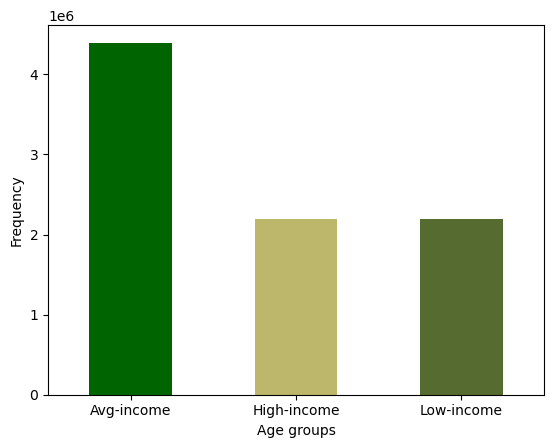

In [47]:
#Creating bar plot for income_group
bar_incomme=inc_group['income_group'].value_counts().plot.bar(color=['darkgreen','darkkhaki','darkolivegreen'])
plt.xlabel('Age groups')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [48]:
#Exporting plot
bar_incomme.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income1.png'))

In [49]:
#Grouping income_group and age_segment_flag
grouped_inc_asg = inc_group.groupby(['income_group', 'age_segment_flag']).size().unstack(fill_value=0)

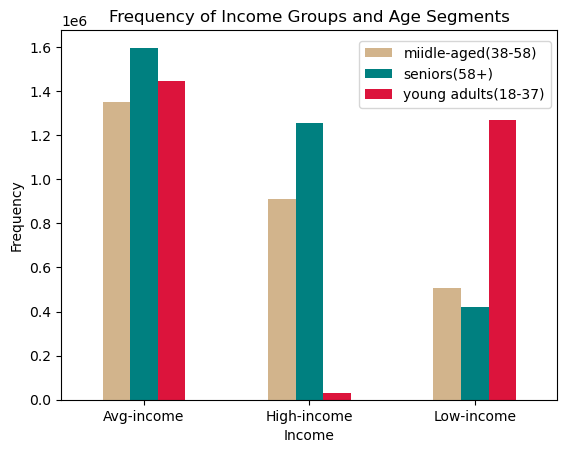

In [50]:
#Creating a bar plot for Income and Age segements
inc_age_bar=grouped_inc_asg.plot.bar(color=['tan', 'teal', 'crimson'])
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Frequency of Income Groups and Age Segments')
plt.legend(loc='upper right', bbox_to_anchor=(1.00015, 0.99))
plt.xticks(rotation=0)
plt.show()

In [51]:
#Exporting plot
inc_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income and age_bar.png'))

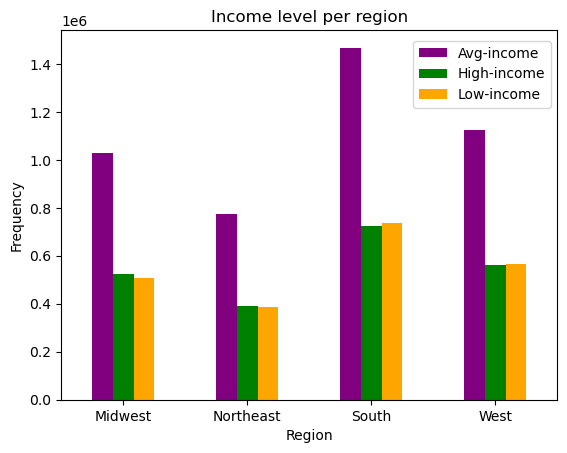

In [52]:
#Grouping income_group and age_segment_flag
grouped_inc_ag = inc_group.groupby(['regional_flag', 'income_group']).size().unstack(fill_value=0)

#Creating a bar plot for Income groups and Regional flag
income_region_box=grouped_inc_ag.plot.bar(color=['purple', 'green', 'orange'])
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Income level per region')
plt.legend(loc='upper right', bbox_to_anchor=(1.00095, 0.99))
plt.xticks(rotation=0)
plt.show()

In [53]:
#Exporting plot
income_region_box.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income and Region bar.png'))

In [54]:
#Aggregating 'order_id' and 'prices' 
agg_small_icgroup = small_icgroup.groupby(['department', 'income_group','regional_flag'], as_index=False).agg({'order_id': 'count', 'prices': 'sum'})

In [55]:
agg_small_icgroup.head()

,department,income_group,regional_flag,order_id,prices
0,alcohol,Avg-income,Midwest,4453,37216.3
1,alcohol,Avg-income,Northeast,2973,23741.6
2,alcohol,Avg-income,South,6322,53196.0
3,alcohol,Avg-income,West,4727,39918.8
4,alcohol,High-income,Midwest,2558,21086.1


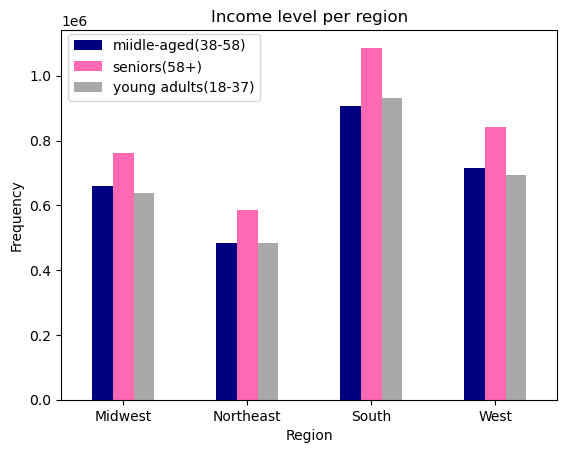

In [56]:
#Grouping regions and age_segment_flag
grouped_age_reg = inc_group.groupby(['regional_flag', 'age_segment_flag']).size().unstack(fill_value=0)

#Creating a bar plot for Income groups and Regional flag
age_seg_reg=grouped_age_reg.plot.bar(color=['navy', 'hotpink', 'darkgray'])
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Income level per region')
plt.legend(loc='center left', bbox_to_anchor=(-0.00015, 0.90))
plt.xticks(rotation=0)
plt.show()

In [57]:
#Exporting plot
age_seg_reg.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_seg and region.png'))

/var/folders/1h/3sdj2tc1297dytyhjybm86l00000gn/T/ipykernel_7470/1031613043.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  dept_income=sns.barplot(data=agg_small_icgroup,x='prices',y='department',hue='income_group',palette='RdYlGn',estimator=np.mean,ci=None)


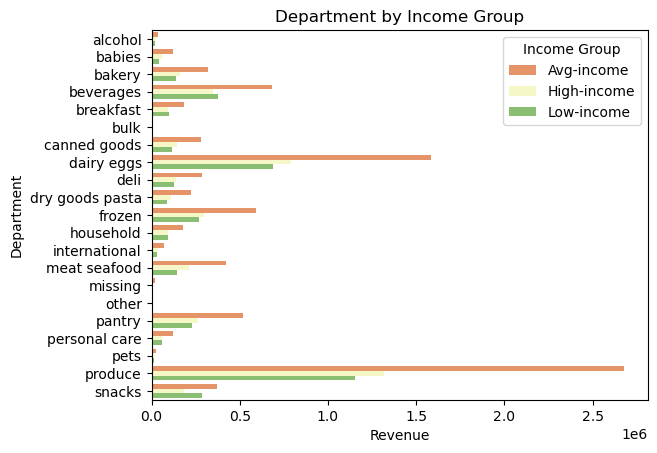

In [58]:
#Creating bar plot department wise for income_group 
dept_income=sns.barplot(data=agg_small_icgroup,x='prices',y='department',hue='income_group',palette='RdYlGn',estimator=np.mean,ci=None)
plt.title("Department by Income Group")
plt.xlabel("Revenue")
plt.ylabel("Department")
plt.legend(title='Income Group')
plt.show()

In [59]:
#Exporting plot
dept_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_group and dept.png'))

In [60]:
#Aggregating income_group values
agg_inc_grp=df_dep.groupby('income_group').agg({'max_order': ['mean','max','min'], 'prices': ['sum','mean','max','min','count']})

In [61]:
agg_inc_grp.head()

max_order               prices                               
                   mean max min          sum      mean   max  min     count
income_group                                                               
Avg-income    35.541338  99   5  116549087.3  7.955378  25.0  1.0  14650351
High-income   35.450164  99   5   58252433.5  7.951041  25.0  1.0   7326391
Low-income    34.567587  99   5   53469842.9  7.302687  25.0  1.0   7321941

In [62]:
#Creating fam_size flag
df_dep.loc[(df_dep['marital_status'] == 'married') & (df_dep['number_of_dependants'] == 0), 'fam_size'] = 'Married without kids'
df_dep.loc[(df_dep['marital_status'] == 'married') & (df_dep['number_of_dependants'] >= 1), 'fam_size'] = 'Married wtih kids'
df_dep.loc[(df_dep['marital_status'] == 'single') & (df_dep['number_of_dependants'] >= 0), 'fam_size'] = 'Single without kids'
df_dep.loc[(df_dep['marital_status'] == 'single') & (df_dep['number_of_dependants'] == 1), 'fam_size'] = 'Single with kids'
df_dep.loc[(df_dep['marital_status'] == 'divorced/widowed') & (df_dep['number_of_dependants'] == 0), 'fam_size'] = 'Divorced/widowed without kids'
df_dep.loc[(df_dep['marital_status'] == 'divorced/widowed') & (df_dep['number_of_dependants'] >= 1), 'fam_size'] = 'Divorced/widowed with kids'
df_dep.loc[(df_dep['marital_status'] == 'living with parents and siblings') & (df_dep['number_of_dependants'] == 0), 'fam_size'] = 'Living with family but no kids'
df_dep.loc[(df_dep['marital_status'] == 'living with parents and siblings') & (df_dep['number_of_dependants'] >= 1), 'fam_size'] = 'Living with family and kids'

In [63]:
df_dep['fam_size'].value_counts(dropna=False)

fam_size
Married wtih kids                20572432
Single without kids               4820080
Divorced/widowed without kids     2503701
Living with family and kids       1402470
Name: count, dtype: int64

In [64]:
#Creating random samples using a sample data with a 70/30 split
np.random.seed(4)
dev=np.random.rand(len(df_dep)) <= 0.7

In [65]:
#Store 70% of the sample in the dataframe big
big_fam= df_dep[dev]

In [66]:
#Store 30% of the sample in the dataframe small
small_fam = df_dep[~dev]

In [67]:
len(df_dep)

29298683

In [68]:
len(big_fam)+len(small_fam)

29298683

In [69]:
#Reducing sample size 
s_fam_size=small_fam[['fam_size', 'income_group','prices','spending_flag','order_id','department',
                     'regional_flag','age_segment_flag','loyalty_flag']]

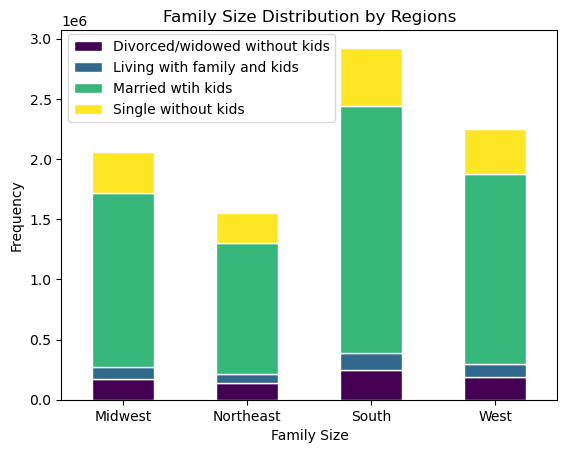

In [70]:
# Creating a stacked bar plot for fam_size and regional_flag
cross_tab = pd.crosstab(s_fam_size['regional_flag'], s_fam_size['fam_size'])
fam_reg=cross_tab.plot.bar(stacked=True, edgecolor='white', cmap='viridis')
plt.xlabel('Family Size')
plt.ylabel('Frequency')
plt.title('Family Size Distribution by Regions')
plt.legend(loc='center left', bbox_to_anchor=(-0.00015, 0.87))
plt.xticks(rotation=0)
plt.show()

In [71]:
#Exporting plot
fam_reg.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_region(cross).png'))

In [72]:
#Aggregating order_id and prices for fam_size
agg_small_fams = small_fam.groupby(['department','regional_flag','fam_size'], as_index=False).agg({'order_id': 'count', 'prices': 'sum'})

/var/folders/1h/3sdj2tc1297dytyhjybm86l00000gn/T/ipykernel_7470/3522228696.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  fams_reg=sns.barplot(data=agg_small_fams,x='prices',y='department',hue='fam_size',palette='Spectral',ci=None)


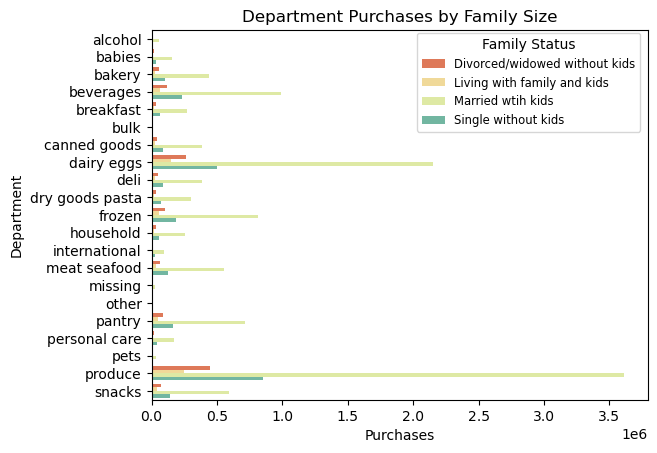

In [73]:
#Creating bar plot of family size 
fams_reg=sns.barplot(data=agg_small_fams,x='prices',y='department',hue='fam_size',palette='Spectral',ci=None)
plt.title("Department Purchases by Family Size")
plt.xlabel("Purchases")
plt.ylabel("Department")
plt.legend(title='Family Status',
bbox_to_anchor=(0.76, 0.71), loc='lower center',fontsize='small')

In [74]:
# Exporting plot
fams_reg.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family size and dept.png'))

In [75]:
#Aggregating fam_size values
agg_fam_s=df_dep.groupby('fam_size').agg({'max_order': ['mean','max','min'], 'prices': ['sum','mean','max','min','count']})

In [76]:
agg_fam_s.head()

max_order               prices                  \
                                    mean max min          sum      mean   max   
fam_size                                                                        
Divorced/widowed without kids  35.559925  99   5   19536336.1  7.802983  25.0   
Living with family and kids    35.697590  99   5   10941276.0  7.801433  25.0   
Married wtih kids              35.153029  99   5  160271319.6  7.790587  25.0   
Single without kids            35.525790  99   5   37522432.0  7.784608  25.0   

                                              
                               min     count  
fam_size                                      
Divorced/widowed without kids  1.0   2503701  
Living with family and kids    1.0   1402470  
Married wtih kids              1.0  20572432  
Single without kids            1.0   4820080

In [77]:
#Using 30% of the sample for loyal customers
loyal_cust=small_age_segment[['order_dow','order_hour_of_day','department','prices','order_id','regional_flag','loyalty_flag']]

/var/folders/1h/3sdj2tc1297dytyhjybm86l00000gn/T/ipykernel_7470/495525808.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  dow_loyal=sns.lineplot(data = loyal_cust, x= 'order_dow', y = 'prices', hue='loyalty_flag',ci=None)
/Users/prateeksharma/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/prateeksharma/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


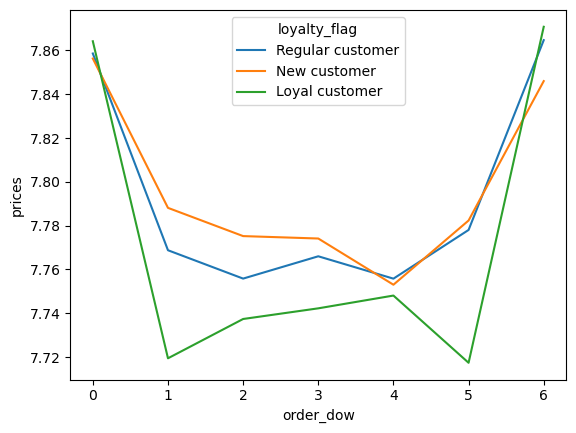

In [78]:
#Creating line chart for loyalty
dow_loyal=sns.lineplot(data = loyal_cust, x= 'order_dow', y = 'prices', hue='loyalty_flag',ci=None)
plt.show()

In [79]:
#Exporting plot
dow_loyal.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Loyal_dow.png'))

/var/folders/1h/3sdj2tc1297dytyhjybm86l00000gn/T/ipykernel_7470/2233627817.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ohod_loyal=sns.lineplot(data = loyal_cust, x='order_hour_of_day', y = 'prices', hue='loyalty_flag',ci=None)
/Users/prateeksharma/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/prateeksharma/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


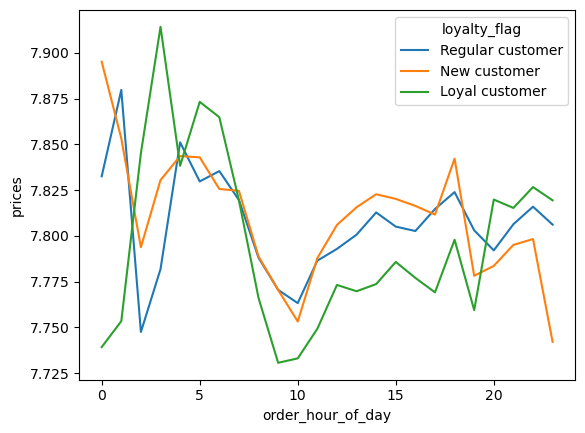

In [80]:
#Creating line chart for order_hour_of_day
ohod_loyal=sns.lineplot(data = loyal_cust, x='order_hour_of_day', y = 'prices', hue='loyalty_flag',ci=None)
plt.show()

In [81]:
#Exporting plot
ohod_loyal.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Loyal_ohod.png'))

In [82]:
#Aggregating order_id and prices for Loyalty
agg_loyal = small_age_segment.groupby(['department','regional_flag','loyalty_flag'], as_index=False).agg({'order_id': 'count', 'prices': 'sum'})

In [83]:
agg_loyal.head()

,department,regional_flag,loyalty_flag,order_id,prices
0,alcohol,Midwest,Loyal customer,2679,22001.4
1,alcohol,Midwest,New customer,1603,13074.8
2,alcohol,Midwest,Regular customer,5126,41430.0
3,alcohol,Northeast,Loyal customer,1875,14541.1
4,alcohol,Northeast,New customer,1333,11095.6


/var/folders/1h/3sdj2tc1297dytyhjybm86l00000gn/T/ipykernel_7470/2990089064.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  loyalty=sns.barplot(data=agg_loyal,x='order_id',y='department',hue='loyalty_flag',palette='bright',ci=None)


Text(0, 0.5, 'Department')

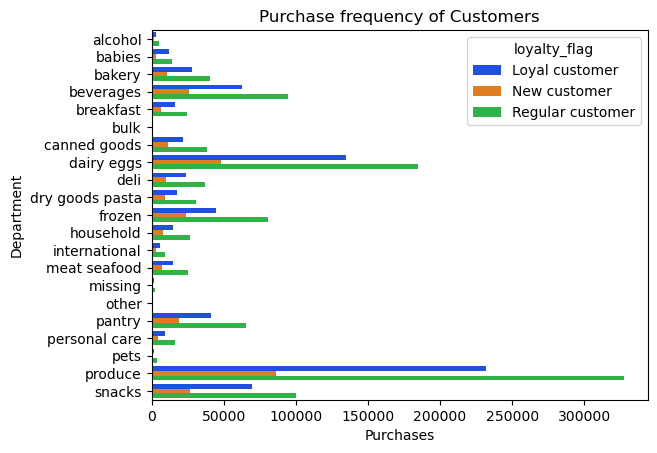

In [84]:
#Creating bar plot of loyalty
loyalty=sns.barplot(data=agg_loyal,x='order_id',y='department',hue='loyalty_flag',palette='bright',ci=None)
plt.title("Purchase frequency of Customers")
plt.xlabel("Purchases")
plt.ylabel("Department")

In [85]:
#Exporting plot
loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customers_dept.png'))

In [86]:
#Exporting file
df_dep.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_active_cust_final.pkl'))